# Medical appointment project

This dataset contains information about medical appointments and whether patients attended their appointments or not. 

It includes various attributes such as patient demographics, appointment scheduling details, medical conditions, and whether the patient showed up for the appointment.

## Importing necessary libraries

In [64]:
import numpy as np
import pandas as pd

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [66]:
import datetime
from time import strftime

In [67]:
Med_data = pd.read_csv('Healthcare.csv')
Med_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [68]:
Med_data.shape

(110527, 14)

#### As we can see above, this dataset contains 14 columns and 110527 rows

In [69]:
Med_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [70]:
Med_data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [71]:
# Let's drop those columns from the dataset which are not useful for the analysis
Med_data.drop(['PatientId','AppointmentID','Neighbourhood'],axis=1, inplace=True)

In [72]:
Med_data.shape

(110527, 11)

In [73]:
Med_data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No


In [74]:
#modifying the date and time into standard form
Med_data['ScheduledDay'] = pd.to_datetime(Med_data['ScheduledDay']).dt.date.astype('datetime64[ns]')
Med_data['AppointmentDay'] = pd.to_datetime(Med_data['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [75]:
Med_data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No


In [76]:
Med_data['sch_weekday'] = Med_data['ScheduledDay'].dt.dayofweek

In [77]:
Med_data['app_weekday'] = Med_data['AppointmentDay'].dt.dayofweek

In [78]:
Med_data['sch_weekday'].value_counts()

1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: sch_weekday, dtype: int64

In [79]:
Med_data['app_weekday'].value_counts()

2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: app_weekday, dtype: int64

In [80]:
Med_data.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
       'No-show', 'sch_weekday', 'app_weekday'],
      dtype='object')

#### As we can see above the names of some columns have spelling errors we have to correct them for better representation and understanding

In [81]:
Med_data= Med_data.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

In [82]:
Med_data.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived',
       'NoShow', 'sch_weekday', 'app_weekday'],
      dtype='object')

#### Let's see how our target variable is distributed

In [83]:
Med_data['NoShow'].value_counts()

No     88208
Yes    22319
Name: NoShow, dtype: int64

Text(0.5, 1.0, 'Count of target variable per category')

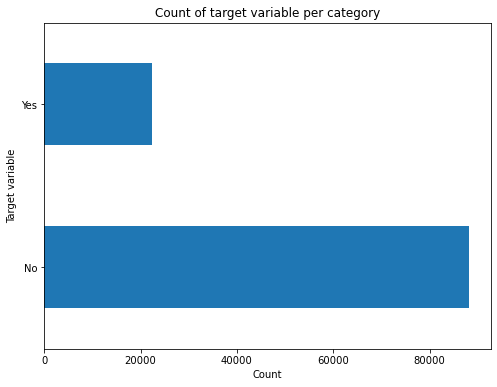

In [84]:
Med_data['NoShow'].value_counts().plot(kind='barh', figsize=(8,6))
plt.xlabel('Count')
plt.ylabel('Target variable')
plt.title('Count of target variable per category')

#### As we can see here below, the dataset is highly imbalanced since the difference between 'Yes' and 'No' is high

In [85]:
# calculating the % of appointments or not 
100*Med_data['NoShow'].value_counts()/len(Med_data['NoShow'])

No     79.806744
Yes    20.193256
Name: NoShow, dtype: float64

In [88]:
Med_data['NoShow'].value_counts()

No     88208
Yes    22319
Name: NoShow, dtype: int64

In [89]:
(Med_data['NoShow'].value_counts())/len(Med_data)

No     0.798067
Yes    0.201933
Name: NoShow, dtype: float64

In [90]:
Med_data['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [91]:
Med_data['Age'].max()

115

In [92]:
Med_data['Age'].min()

-1

#### Let's check whether the dataset has any missing value

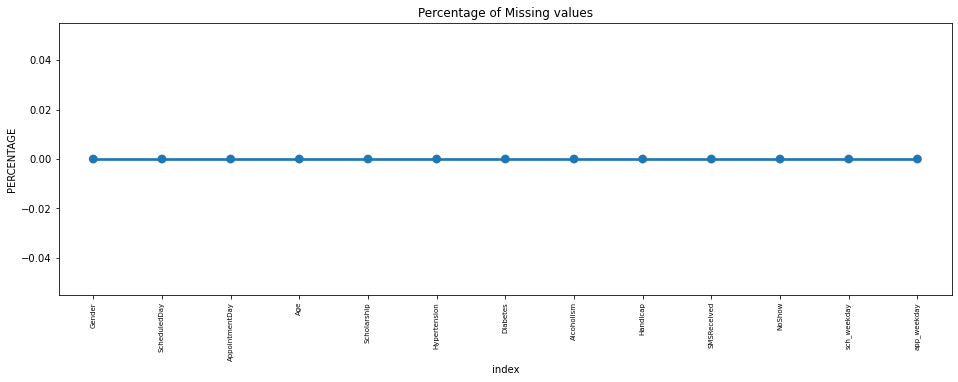

In [93]:
missing = pd.DataFrame((Med_data.isnull().sum())*100/Med_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

### Missing data

1. No missing value is present in this dataset

2. For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.

3. For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.

4. As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values.

# Data cleaning

In [94]:
# Create a copy of Med_data for manipulation and processing
new_data = Med_data.copy()

In [95]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Scholarship     110527 non-null  int64         
 5   Hypertension    110527 non-null  int64         
 6   Diabetes        110527 non-null  int64         
 7   Alcoholism      110527 non-null  int64         
 8   Handicap        110527 non-null  int64         
 9   SMSReceived     110527 non-null  int64         
 10  NoShow          110527 non-null  object        
 11  sch_weekday     110527 non-null  int64         
 12  app_weekday     110527 non-null  int64         
dtypes: datetime64[ns](2), int64(9), object(2)
memory usage: 11.0+ MB


#### There's no null value in the dataset, therefore data cleaning is not needed

In [97]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 20) for i in range(1, 118, 20)]

Med_data['Age_group'] = pd.cut(Med_data.Age, range(1, 130, 20), right=False, labels=labels)
Med_data.drop(['Age'], axis=1, inplace=True)

# Data exploration

In [98]:
list(Med_data.columns)

['Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMSReceived',
 'NoShow',
 'sch_weekday',
 'app_weekday',
 'Age_group']

---------- Gender ----------
F    71840
M    38687
Name: Gender, dtype: int64
---------- ScheduledDay ----------
2016-05-03    4238
2016-05-02    4216
2016-05-16    4120
2016-05-05    4095
2016-05-10    4024
              ... 
2016-04-16       1
2016-01-28       1
2015-11-10       1
2016-03-19       1
2016-03-05       1
Name: ScheduledDay, Length: 111, dtype: int64
---------- AppointmentDay ----------
2016-06-06    4692
2016-05-16    4613
2016-05-09    4520
2016-05-30    4514
2016-06-08    4479
2016-05-11    4474
2016-06-01    4464
2016-06-07    4416
2016-05-12    4394
2016-05-02    4376
2016-05-18    4373
2016-05-17    4372
2016-06-02    4310
2016-05-10    4308
2016-05-31    4279
2016-05-05    4273
2016-05-19    4270
2016-05-03    4256
2016-05-04    4168
2016-06-03    4090
2016-05-24    4009
2016-05-13    3987
2016-05-25    3909
2016-05-06    3879
2016-05-20    3828
2016-04-29    3235
2016-05-14      39
Name: AppointmentDay, dtype: int64
---------- Scholarship ----------
0    99666
1 

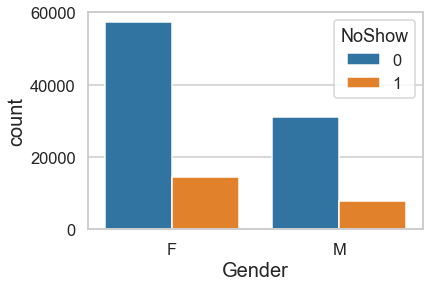

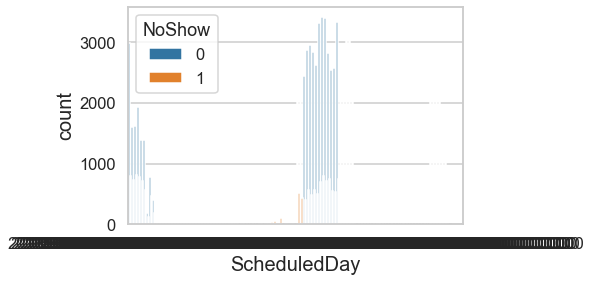

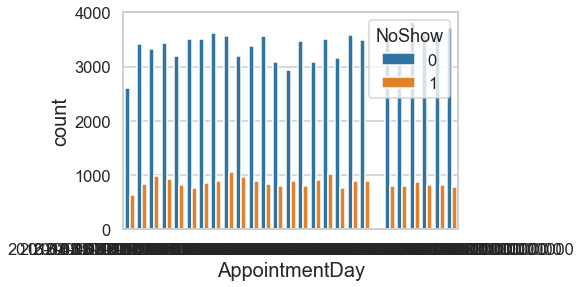

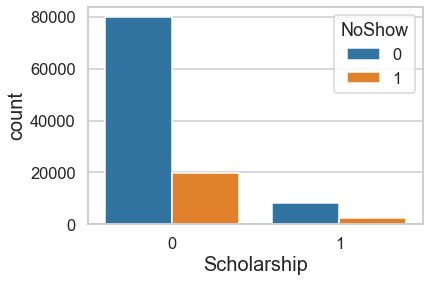

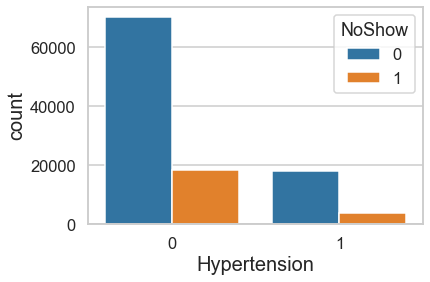

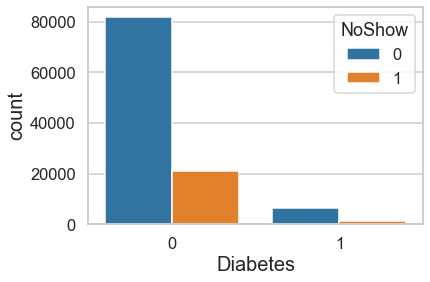

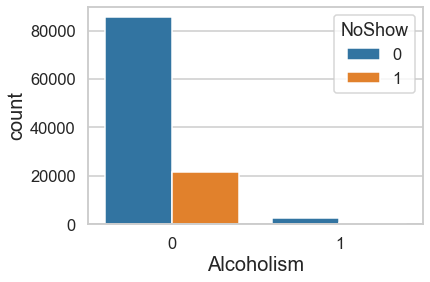

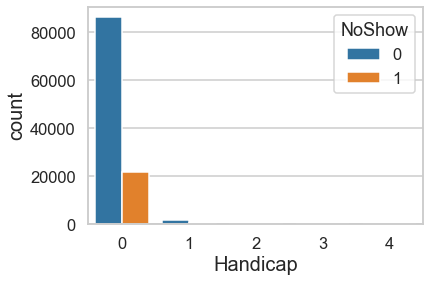

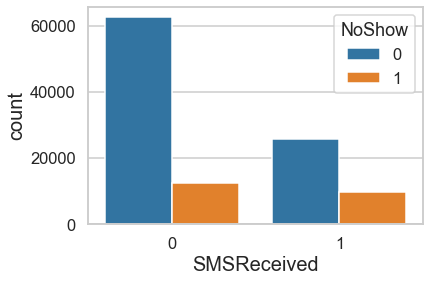

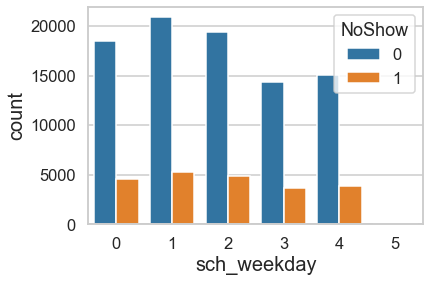

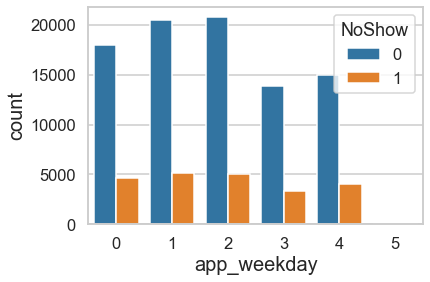

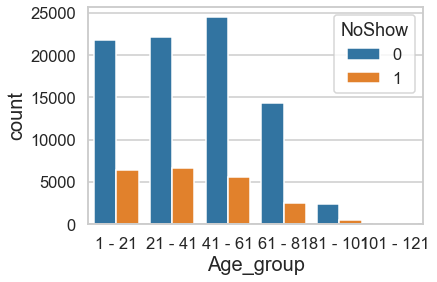

In [126]:
#having a loook into the values of count of each columns and their count in respect to NoShow column
for i, predictor in enumerate(Med_data.drop(columns=['NoShow'])):
    print('-'*10,predictor,'-'*10)
    print(Med_data[predictor].value_counts())    
    plt.figure(i)
    sns.countplot(data=Med_data, x=predictor, hue='NoShow')
    

In [101]:
Med_data['NoShow'] = np.where(Med_data.NoShow == 'Yes',1,0)

In [102]:
Med_data.NoShow.value_counts()

0    88208
1    22319
Name: NoShow, dtype: int64

#### All the categorical variables are converted into dummy variables

In [103]:
Med_data_dummies = pd.get_dummies(Med_data)
Med_data_dummies.head()

,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday,Gender_F,Gender_M,Age_group_1 - 21,Age_group_21 - 41,Age_group_41 - 61,Age_group_61 - 81,Age_group_81 - 101,Age_group_101 - 121
0,2016-04-29,2016-04-29,0,1,0,0,0,0,0,4,4,1,0,0,0,0,1,0,0
1,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,0,1,0,0,1,0,0,0
2,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,1,0,0,0,0,1,0,0
3,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,1,0,1,0,0,0,0,0
4,2016-04-29,2016-04-29,0,1,1,0,0,0,0,4,4,1,0,0,0,1,0,0,0


#### Build a corelation of all predictors with 'NoShow'

<AxesSubplot:>

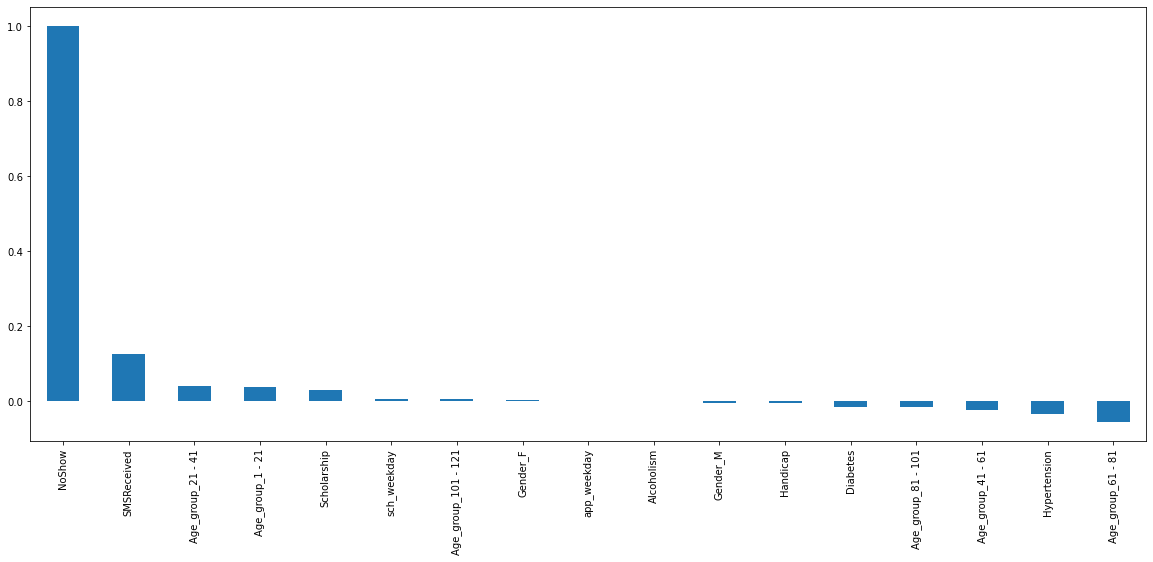

In [104]:
plt.figure(figsize=(20,8))
Med_data_dummies.corr()['NoShow'].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:>

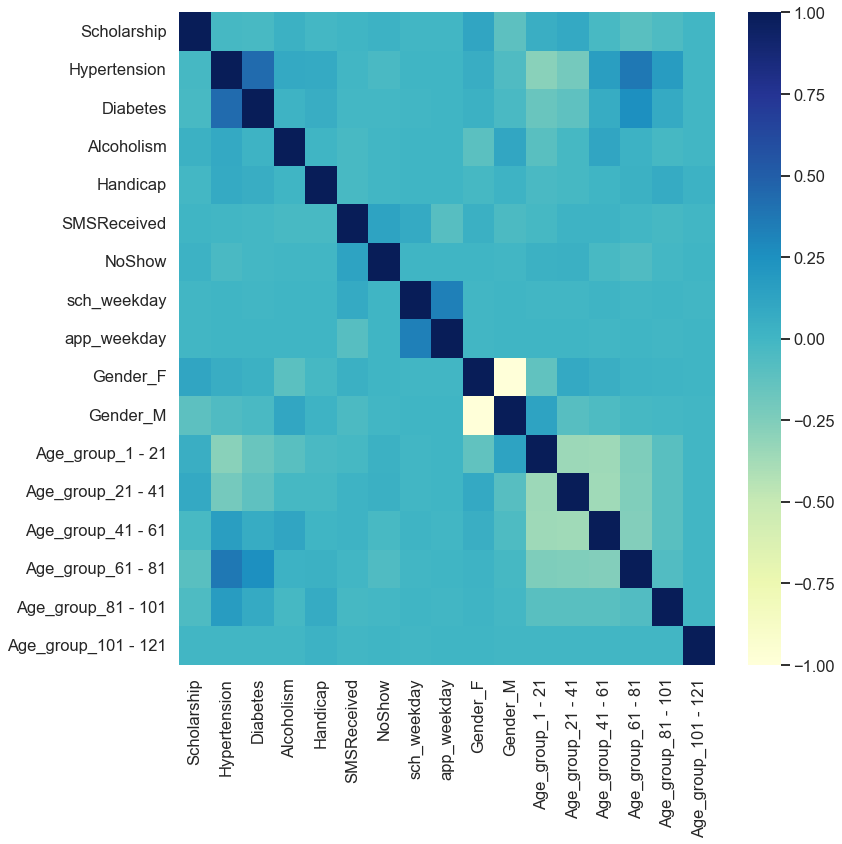

In [117]:
plt.figure(figsize=(12,12))
sns.heatmap(Med_data_dummies.corr(), cmap="YlGnBu")

# Bivariate analysis

In [107]:
new_df1_target0=Med_data.loc[Med_data["NoShow"]==0]
new_df1_target1=Med_data.loc[Med_data["NoShow"]==1]

In [108]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

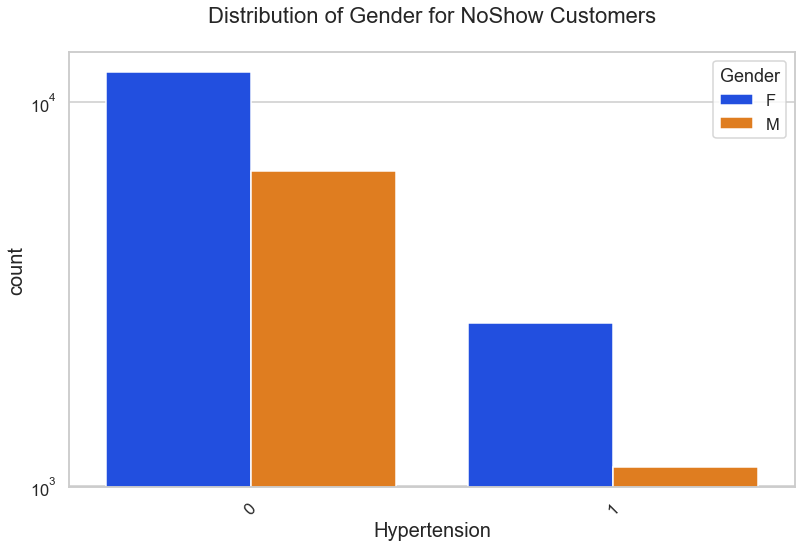

In [109]:
uniplot(new_df1_target1,col='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Gender')


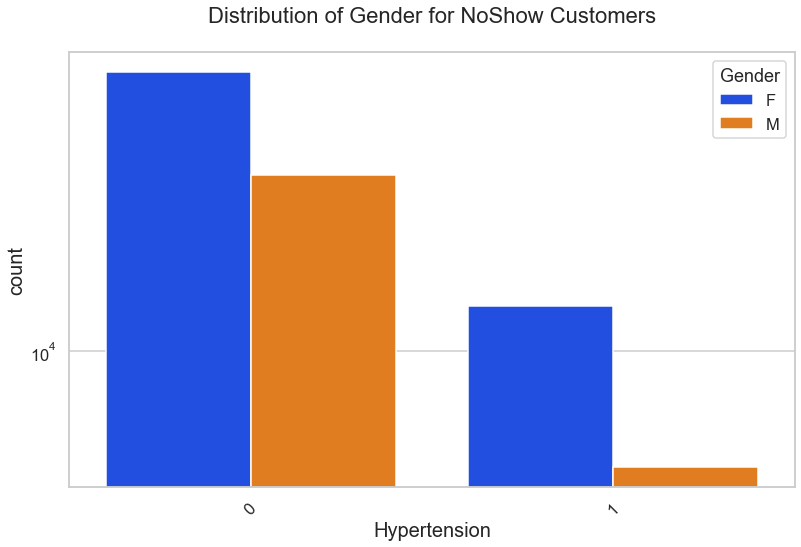

In [110]:
uniplot(new_df1_target0,col='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Gender')


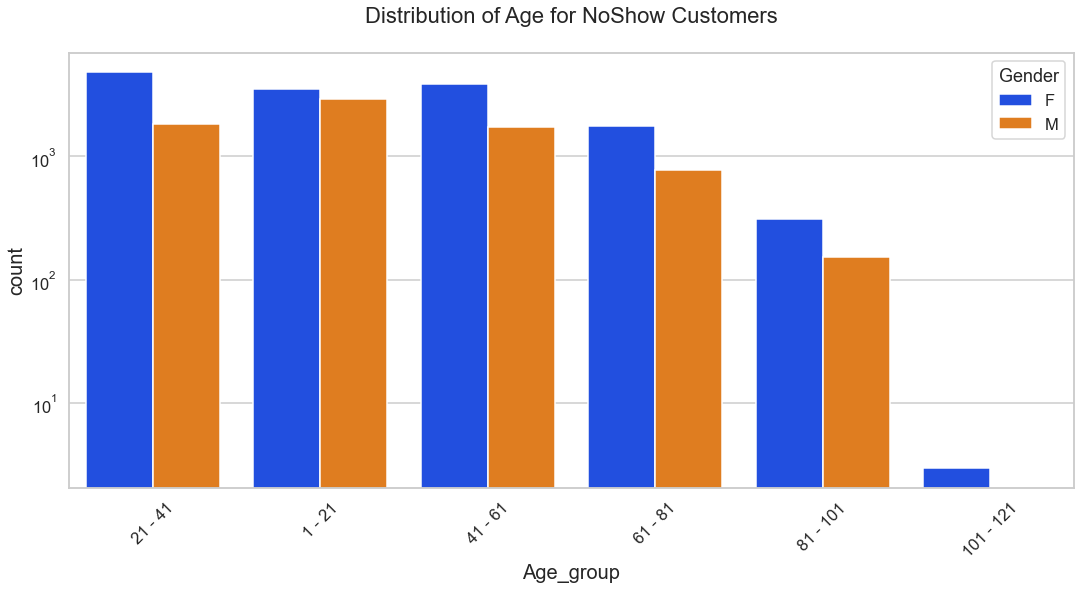

In [111]:
uniplot(new_df1_target1,col='Age_group',title='Distribution of Age for NoShow Customers',hue='Gender')


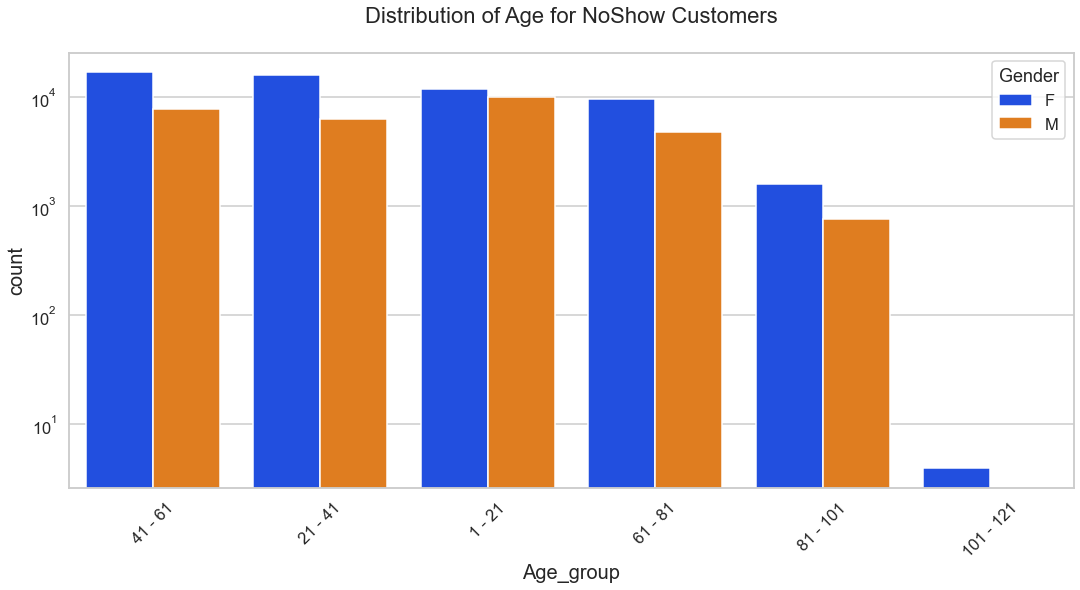

In [112]:
uniplot(new_df1_target0,col='Age_group',title='Distribution of Age for NoShow Customers',hue='Gender')


# Findings

1. Female patients have taken more appointments than male patients

2. Ratio of Nohow and Show is almost equal for age group except Age 0 and Age 1 with 80% show rate for each age group

3. Each Neighbourhood has almost 80% show rate

4. There are 99666 patients without Scholarship and out of them around 80% have come for the visit and out of the 21801 patients with Scholarship around 75% of them have come for the visit.

5. There are around 88,726 patients without Hypertension and out of them around 78% have come for the visit and Out of the 21801 patients with Hypertension around 85% of them have come for the visit.

6. There are around 102,584 patients without Diabetes and out of them around 80% have come for the visit and Out of the 7,943 patients with Diabetes around 83% of them have come for the visit.

7. There are around 75,045 patients who have not received SMS and out of them around 84% have come for the visit and out of the 35,482 patients who have received SMS around 72% of them have come for the visit.

8. There is no appointments on sunday and on saturday appointments are very less in comparison to other week days.